In [2]:
from helpers import get_client, get_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
es = get_client()  
df = get_data("aggregated-curr-udpjitter-*", es)
# Convert date column to datetime if not already done
df['date'] = pd.to_datetime(df['date'])
# Extract year from the date
df['year'] = df['date'].dt.year

Connected to Elasticsearch.


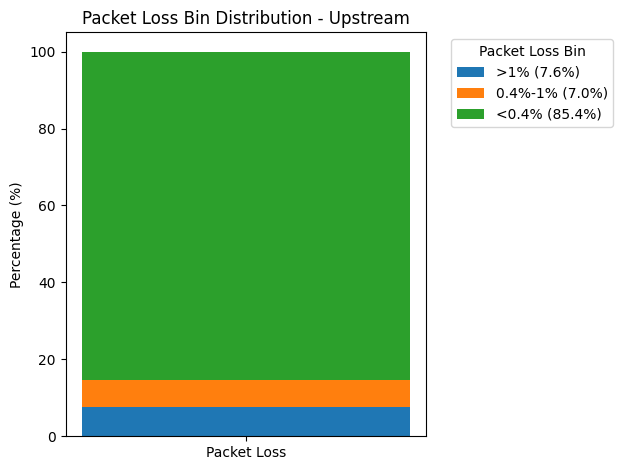

In [9]:
# Calculate percentages
counts = df['packet_loss_up_bin'].value_counts(normalize=True) * 100

# Reorder counts according to desired order
desired_order = ['>1%', '0.4%-1%', '<0.4%']
counts = counts.reindex(desired_order)

# Plot as a single stacked bar
fig, ax = plt.subplots()

bottom = 0
for bin_name, percentage in counts.items():
    ax.bar('Packet Loss', percentage, bottom=bottom, label=f'{bin_name} ({percentage:.1f}%)')
    bottom += percentage

# Labels and title
ax.set_ylabel('Percentage (%)')
ax.set_title('Packet Loss Bin Distribution - Upstream')
ax.legend(title='Packet Loss Bin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


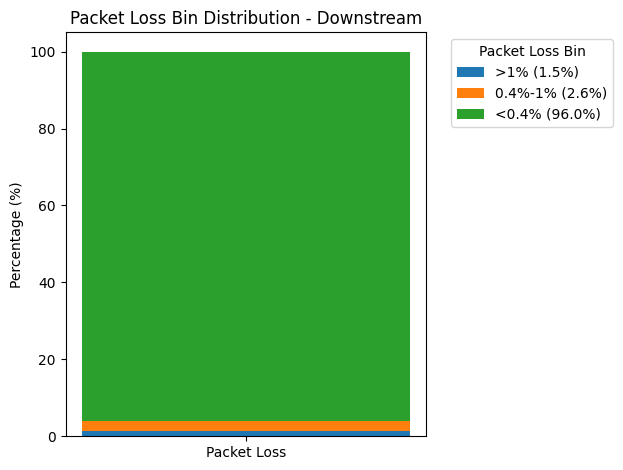

In [10]:
# Calculate percentages
counts = df['packet_loss_down_bin'].value_counts(normalize=True) * 100

# Reorder counts according to desired order
desired_order = ['>1%', '0.4%-1%', '<0.4%']
counts = counts.reindex(desired_order)

# Plot as a single stacked bar
fig, ax = plt.subplots()

bottom = 0
for bin_name, percentage in counts.items():
    ax.bar('Packet Loss', percentage, bottom=bottom, label=f'{bin_name} ({percentage:.1f}%)')
    bottom += percentage

# Labels and title
ax.set_ylabel('Percentage (%)')
ax.set_title('Packet Loss Bin Distribution - Downstream')
ax.legend(title='Packet Loss Bin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


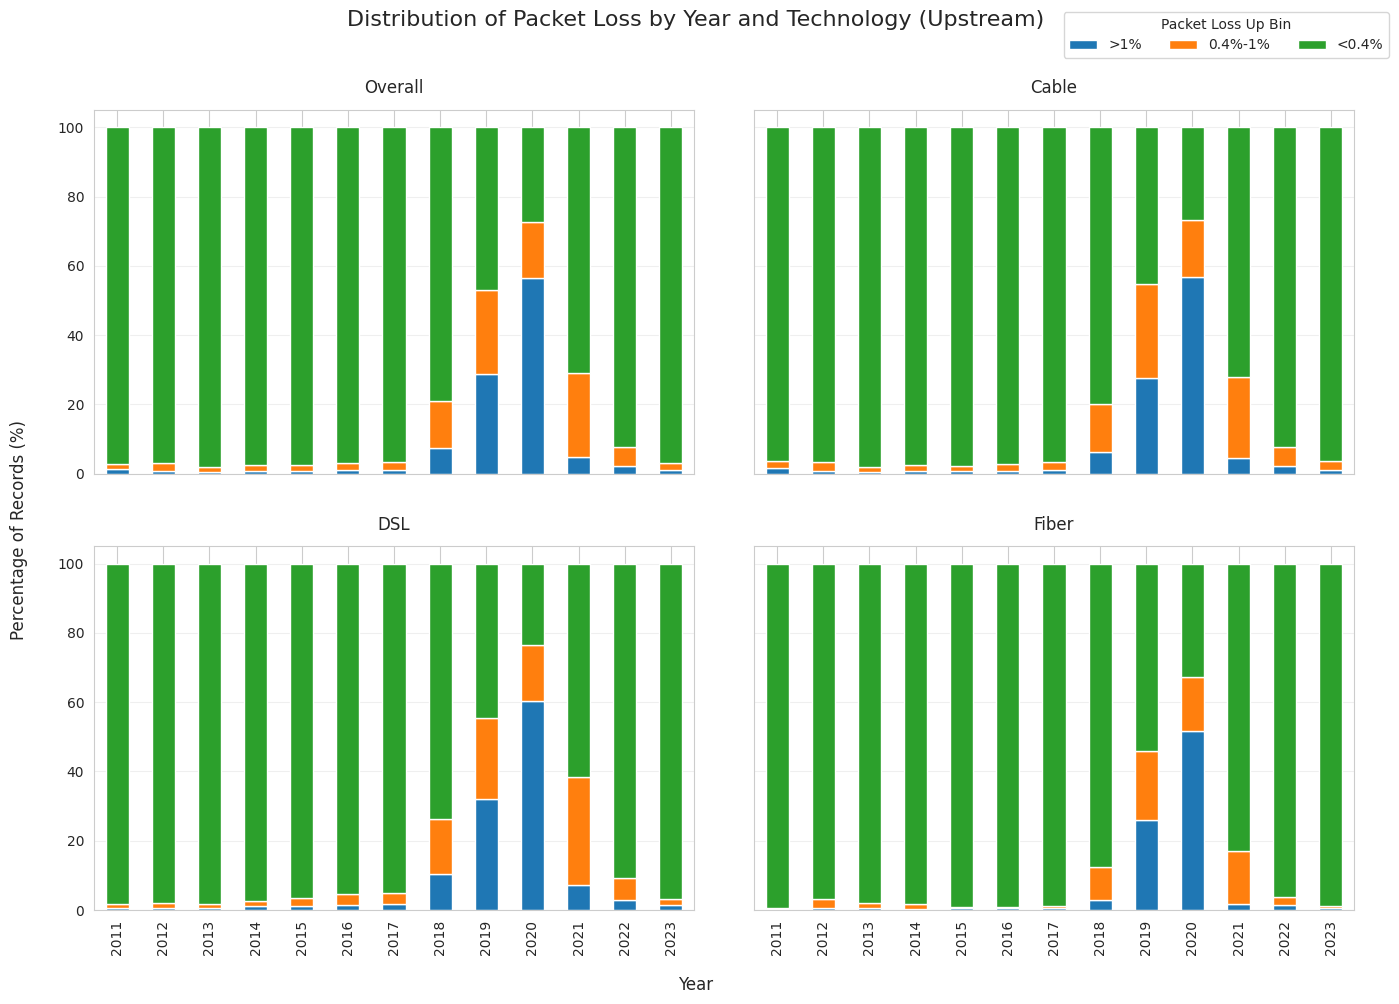

In [8]:

# —————————————————————
# 2) Define panels
# —————————————————————
panels = {
    'Overall': df,
    'Cable':  df[df['operator_technology'] == 'Cable'],
    'DSL':    df[df['operator_technology'] == 'DSL'],
    'Fiber':  df[df['operator_technology'] == 'Fiber']
}

# —————————————————————
# 3) Pivot helper (fix bin order)
# —————————————————————
def make_pivot(sub):
    grp   = sub.groupby(['year','packet_loss_up_bin']).size().reset_index(name='count')
    total = sub.groupby('year').size().reset_index(name='total')
    m     = pd.merge(grp, total, on='year')
    m['pct'] = m['count'] / m['total'] * 100
    order = ['>1%', '0.4%-1%', '<0.4%']
    piv = m.pivot(index='year', columns='packet_loss_up_bin', values='pct').fillna(0)
    return piv.reindex(columns=order)

# —————————————————————
# 4) Draw 2×2 stacked bars
# —————————————————————
fig, axes = plt.subplots(
    2, 2,
    figsize=(14, 10),
    sharex=True,
    sharey=True
)

for idx, (title, subdf) in enumerate(panels.items()):
    i, j = divmod(idx, 2)
    ax = axes[i][j]
    piv = make_pivot(subdf)
    piv.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        legend=False
    )
    ax.set_title(title, pad=12)
    ax.set_xlabel('')
    # ax.set_xticklabels([])
    ax.set_ylabel('')
    # ax.set_yticklabels([])

    ax.grid(axis='y', alpha=0.3)

# —————————————————————
# 5) Global title, labels, legend, and spacing
# —————————————————————
fig.suptitle(
    'Distribution of Packet Loss by Year and Technology (Upstream)',
    fontsize=16, y=1.02
)
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.text(0.01, 0.5, 'Percentage of Records (%)', va='center',
         rotation='vertical', fontsize=12)

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Packet Loss Up Bin',
    loc='upper right',
    ncol=len(labels),
    frameon=True,
    bbox_to_anchor=(1, 1.025)
)

fig.subplots_adjust(
    left=0.07, right=0.97,
    top=0.92, bottom=0.12,
    wspace=0.1, hspace=0.2
)

plt.savefig('./plots/packet_loss/packet_loss_upstream.png', dpi=600)
plt.show()


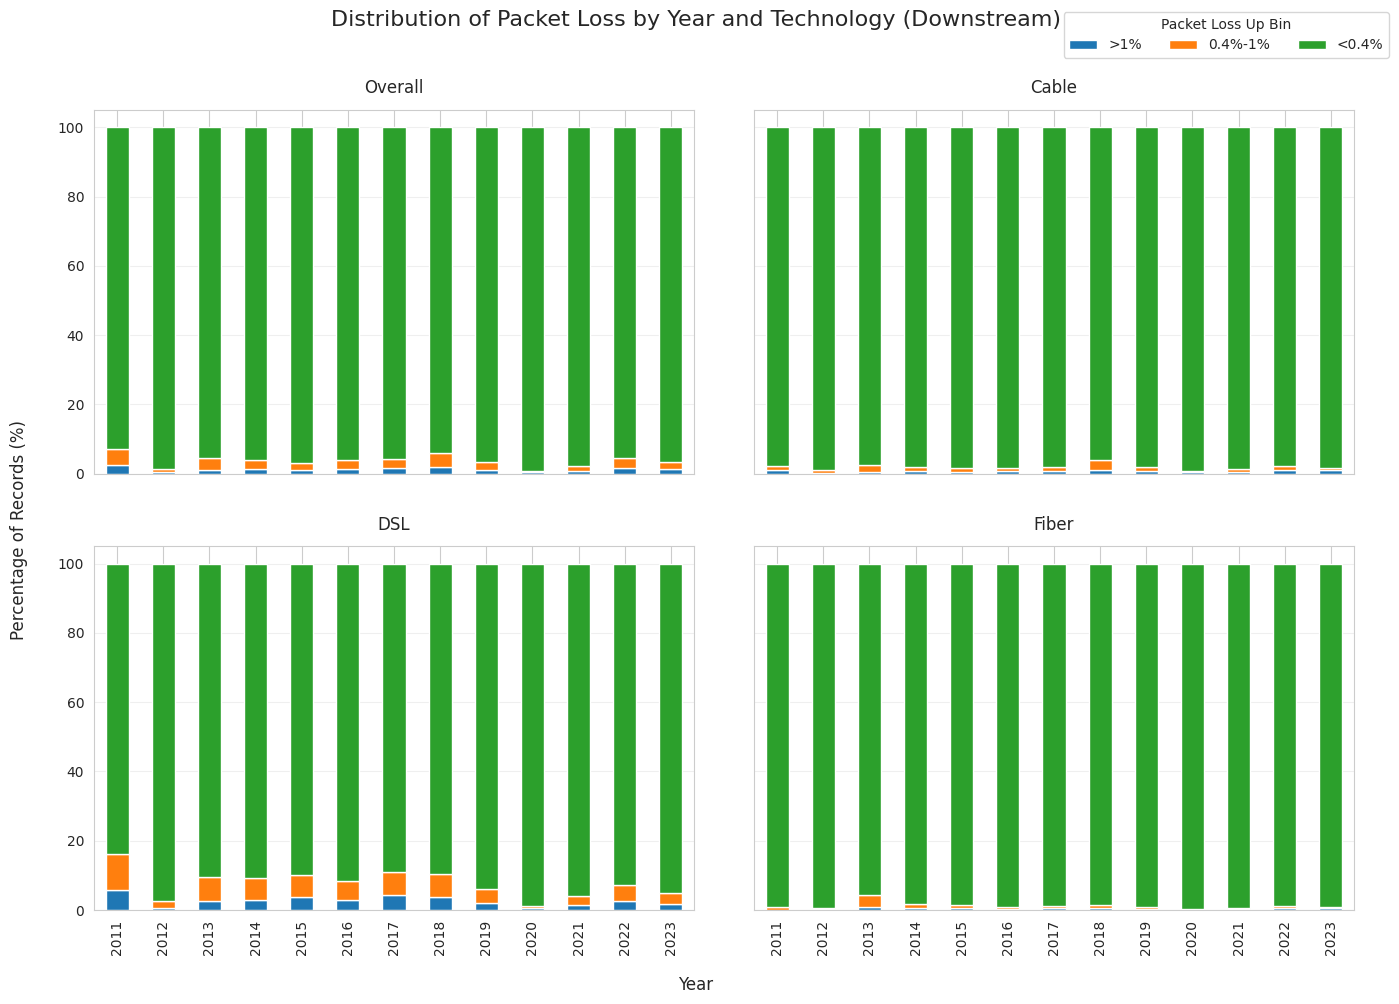

In [9]:

# —————————————————————
# 2) Define panels
# —————————————————————
panels = {
    'Overall': df,
    'Cable':  df[df['operator_technology'] == 'Cable'],
    'DSL':    df[df['operator_technology'] == 'DSL'],
    'Fiber':  df[df['operator_technology'] == 'Fiber']
}

# —————————————————————
# 3) Pivot helper (fix bin order)
# —————————————————————
def make_pivot(sub):
    grp   = sub.groupby(['year','packet_loss_down_bin']).size().reset_index(name='count')
    total = sub.groupby('year').size().reset_index(name='total')
    m     = pd.merge(grp, total, on='year')
    m['pct'] = m['count'] / m['total'] * 100
    order = ['>1%', '0.4%-1%', '<0.4%']
    piv = m.pivot(index='year', columns='packet_loss_down_bin', values='pct').fillna(0)
    return piv.reindex(columns=order)

# —————————————————————
# 4) Draw 2×2 stacked bars
# —————————————————————
fig, axes = plt.subplots(
    2, 2,
    figsize=(14, 10),
    sharex=True,
    sharey=True
)

for idx, (title, subdf) in enumerate(panels.items()):
    i, j = divmod(idx, 2)
    ax = axes[i][j]
    piv = make_pivot(subdf)
    piv.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        legend=False
    )
    ax.set_title(title, pad=12)
    ax.set_xlabel('')
    # ax.set_xticklabels([])
    ax.set_ylabel('')
    # ax.set_yticklabels([])

    ax.grid(axis='y', alpha=0.3)

# —————————————————————
# 5) Global title, labels, legend, and spacing
# —————————————————————
fig.suptitle(
    'Distribution of Packet Loss by Year and Technology (Downstream)',
    fontsize=16, y=1.02
)
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.text(0.01, 0.5, 'Percentage of Records (%)', va='center',
         rotation='vertical', fontsize=12)

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Packet Loss Up Bin',
    loc='upper right',
    ncol=len(labels),
    frameon=True,
    bbox_to_anchor=(1, 1.025)
)

fig.subplots_adjust(
    left=0.07, right=0.97,
    top=0.92, bottom=0.12,
    wspace=0.1, hspace=0.2
)

plt.savefig('./plots/packet_loss/packet_loss_downstream.png', dpi=600)
plt.show()


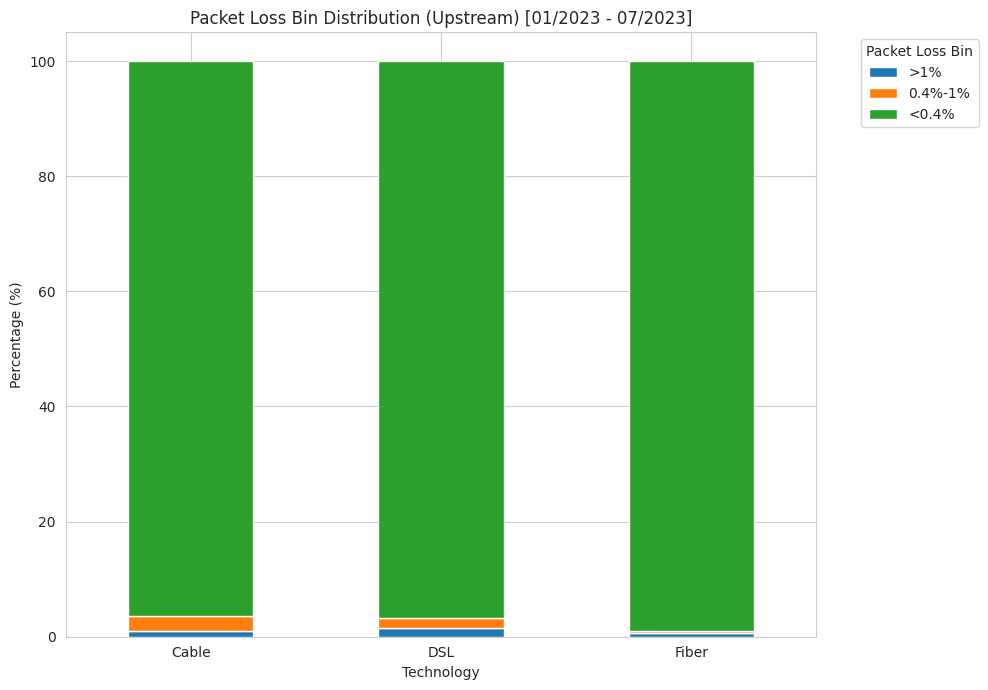

In [6]:
sns.set_style('whitegrid')
df = df[df['operator_technology'].isin(['Cable', 'DSL', 'Fiber'])]
tmp = df[df['year'] == 2023]
# Define the desired order
desired_order = ['>1%', '0.4%-1%', '<0.4%']

# Calculate yearly percentages and reorder columns
yearly_counts = tmp.groupby('operator_technology')['packet_loss_up_bin'].value_counts(normalize=True).unstack().reindex(columns=desired_order) * 100

# Plot stacked bar chart
ax = yearly_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xticks(rotation=0)
# Labels and title
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Technology')
ax.set_title('Packet Loss Bin Distribution (Upstream) [01/2023 - 07/2023]')
ax.legend(title='Packet Loss Bin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(f'./plots/packet_loss/packet_loss_2023_upstream.png', dpi=600)
plt.show()

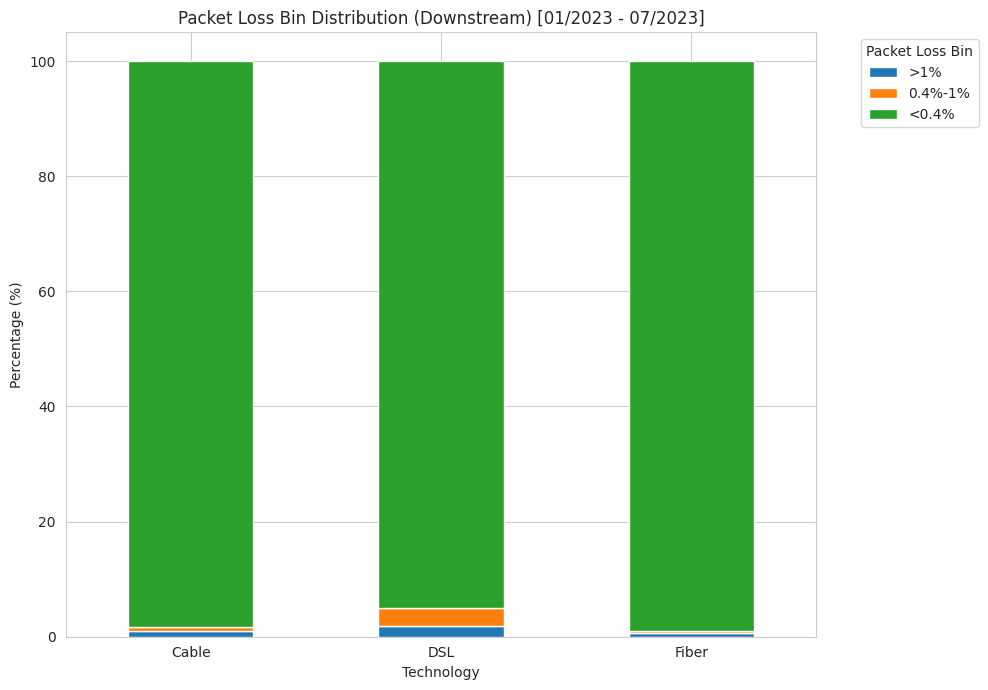

In [7]:
sns.set_style('whitegrid')
df = df[df['operator_technology'].isin(['Cable', 'DSL', 'Fiber'])]
tmp = df[df['year'] == 2023]
# Define the desired order
desired_order = ['>1%', '0.4%-1%', '<0.4%']

# Calculate yearly percentages and reorder columns
yearly_counts = tmp.groupby('operator_technology')['packet_loss_down_bin'].value_counts(normalize=True).unstack().reindex(columns=desired_order) * 100

# Plot stacked bar chart
ax = yearly_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xticks(rotation=0)
# Labels and title
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Technology')
ax.set_title('Packet Loss Bin Distribution (Downstream) [01/2023 - 07/2023]')
ax.legend(title='Packet Loss Bin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(f'./plots/packet_loss/packet_loss_2023_downstream.png', dpi=600)
plt.show()